<a href="https://colab.research.google.com/github/jaeh04/Toy/blob/main/SHAP_Colab_%EC%B5%9C%EC%A2%85_%EC%A0%9C%EC%B6%9C%EC%9A%A9_%EB%B2%84%EC%A0%84_251006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2025.03.07 15:03

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/tmp/ipython-input-632491470.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 10342.1484 - val_loss: 4696.7666
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 4781.1465 - val_loss: 4700.5747
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 4781.9932 - val_loss: 4703.6528
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 4782.5664 - val_loss: 4705.9028
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 4782.9355 - val_loss: 4707.4326
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 4783.1646 - val_loss: 4708.4219
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 4783.2974 - val_loss: 4709.0542
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 4783.3164 - val_loss: 4711.7334
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 4466.0815 - val_loss: 2714.0925
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 2416.0027 - val_loss: 2215.6575
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 2297.2

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_5
Received: inputs=['Tensor(shape=(100, 24, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_5
Received: inputs=['Tensor(shape=(50, 24, 1))']
  warnings.warn(msg)


shap_values.shape: (100, 24)
X_test_shap_2d.shape: (100, 24)


/tmp/ipython-input-632491470.py:131: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)  # 원본 컬럼명 적용


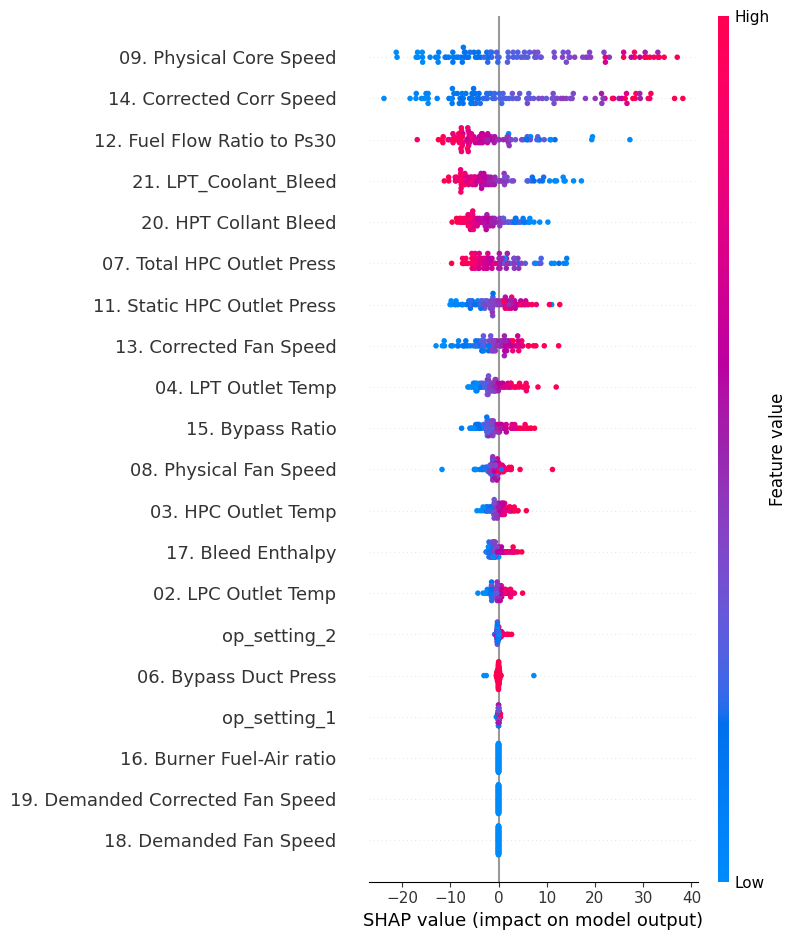

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
RMSE: 43.49937701601311
MAE: 34.4556999206543


In [6]:
# 필요한 패키지 설치
!pip install shap matplotlib scikit-learn openpyxl

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------
# 1. 랜덤 시드 고정 (결과 일관성 유지)
# ----------------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# ----------------------------
# 2. C-MAPSS FD004 데이터 로드 및 전처리
# ----------------------------
# 데이터 로드 함수
def load_data():
    # 파일 경로 지정 (Google Drive 내 파일)
    base_dir = "/content/drive/MyDrive/jaeh04@pukyong.ac.kr 2021-11-22 01:12/데스크탑에서 올린 파일들/2025년 대한국방혁신공학회/"
    train_file = base_dir + "train_FD001.xlsx"
    columns_file = base_dir + "columns.xlsx"

    # 데이터 로드
    train_df = pd.read_excel(train_file, engine='openpyxl')
    columns_df = pd.read_excel(columns_file, engine='openpyxl')

    return train_df, columns_df

# 데이터 불러오기
train_data, columns_data = load_data()

# ----------------------------
# 3. 데이터 정규화 및 특성 선택 (피어슨 상관계수 vs. SHAP)
# ----------------------------
def normalize_data(df):
    scaler = MinMaxScaler()
    df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
    return df, scaler

# 데이터 정규화 수행
data, scaler = normalize_data(train_data)

# ----------------------------
# 4. LSTM 모델 정의
# ----------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(25, activation='relu'),
        Dense(1)  # RUL 예측
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ----------------------------
# 5. 데이터셋 분리 및 모델 학습
# ----------------------------
X = data.iloc[:, 2:].values  # 센서 데이터
y = data.iloc[:, 1].values   # RUL 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 모델 생성 및 학습
model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# ----------------------------
# 6. 모델 저장 및 재사용 (최신 형식 적용)
# ----------------------------

## ✅ 방법 1: 최신 Keras 형식 사용 (권장)
model.save("fixed_model.keras")  # Colab에서 사용 가능
model = tf.keras.models.load_model("fixed_model.keras")

## ✅ 방법 2: 기존 HDF5 (.h5) 방식 유지 (대체 옵션)
# model.save("fixed_model.h5")
# model = tf.keras.models.load_model("fixed_model.h5", compile=False)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# ----------------------------
# 7. SHAP 변수 중요도 분석 (컬럼명 적용)
# ----------------------------

# ✅ 원본 데이터의 컬럼명 저장 (Feature 1-23 대신 원본 스키마 사용)
feature_names = data.columns[2:].tolist()  # 첫 2개 컬럼(ID, RUL 제외)

# ✅ SHAP Explainer 적용 (모델 입력 차원과 동일하게 유지)
X_train_shap = X_train[:100]  # 원본 차원 유지 (100, 24, 1)
X_test_shap = X_test[:100]    # 원본 차원 유지 (100, 24, 1)

# ✅ SHAP Explainer 생성
explainer = shap.GradientExplainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

# ✅ SHAP 값의 차원 확인 후 변환 (리스트에서 NumPy 배열로 변환)
shap_values = np.array(shap_values)  # 리스트를 NumPy 배열로 변환
if shap_values.ndim == 4:  # (1, 샘플 수, 특성 수, 1) 형태일 경우 차원 축소
    shap_values = shap_values.squeeze()  # (샘플 수, 특성 수) 형태로 변환

# ----------------------------
# 8. SHAP 결과 시각화 (컬럼명 적용)
# ----------------------------

# ✅ X_test_shap도 2D 형태로 변환
X_test_shap_2d = X_test_shap.reshape(X_test_shap.shape[0], X_test_shap.shape[1])  # (100, 24)

# ✅ shap.summary_plot() 호출 시 feature_names 추가
print(f"shap_values.shape: {shap_values.shape}")  # (샘플 수, 특성 수)
print(f"X_test_shap_2d.shape: {X_test_shap_2d.shape}")  # (샘플 수, 특성 수)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)  # 원본 컬럼명 적용
plt.show()



# ----------------------------
# 9. 성능 평가
# ----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

2025.03.07 15:25

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/tmp/ipython-input-2500473587.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - loss: 10342.1484 - val_loss: 4696.7666
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 4781.1465 - val_loss: 4700.5747
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 4781.9932 - val_loss: 4703.6528
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 4782.5664 - val_loss: 4705.9028
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 4782.9355 - val_loss: 4707.4326
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 4783.1646 - val_loss: 4708.4219
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - loss: 4783.2974 - val_loss: 4709.0542
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 4783.3164 - val_loss: 4711.7334
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 4466.0815 - val_loss: 2714.0925
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 2416.0027 - val_loss: 2215.6575
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 2297.2

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(100, 24, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(50, 24, 1))']
  warnings.warn(msg)
/tmp/ipython-input-2500473587.py:129: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)


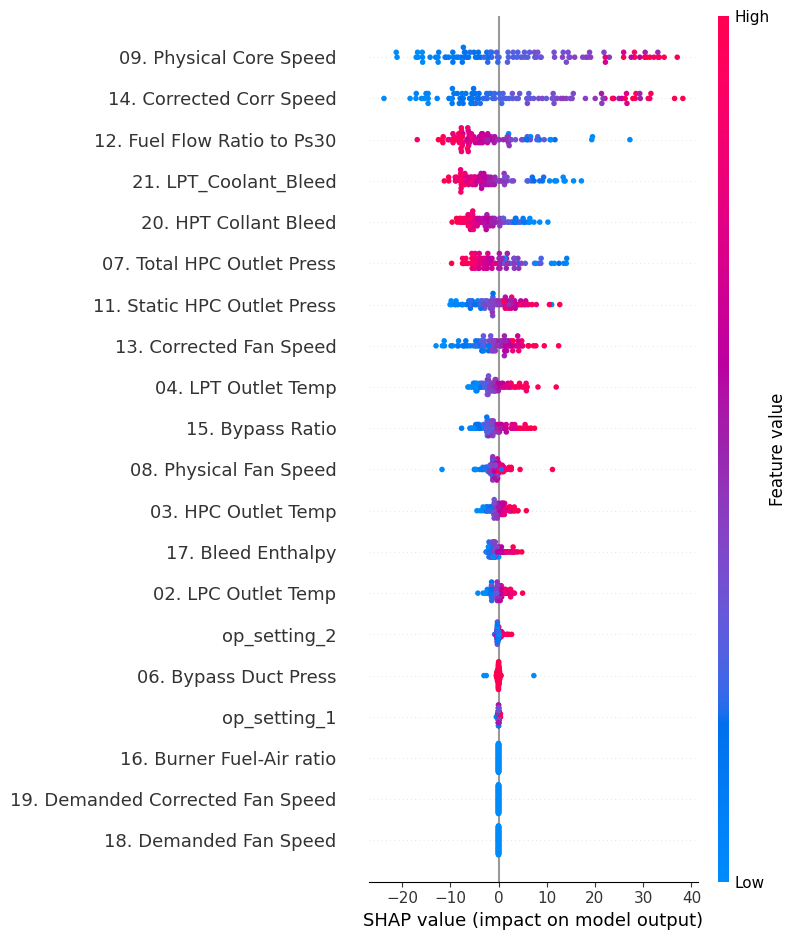

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x600 with 0 Axes>

In [5]:
# 필요한 패키지 설치
!pip install shap matplotlib scikit-learn openpyxl

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------
# 1. 랜덤 시드 고정 (결과 일관성 유지)
# ----------------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# ----------------------------
# 2. C-MAPSS FD004 데이터 로드 및 전처리
# ----------------------------
# 데이터 로드 함수
def load_data():
    # 파일 경로 지정 (Google Drive 내 파일)
    base_dir = "/content/drive/MyDrive/jaeh04@pukyong.ac.kr 2021-11-22 01:12/데스크탑에서 올린 파일들/2025년 대한국방혁신공학회/"
    train_file = base_dir + "train_FD001.xlsx"
    columns_file = base_dir + "columns.xlsx"

    # 데이터 로드
    train_df = pd.read_excel(train_file, engine='openpyxl')
    columns_df = pd.read_excel(columns_file, engine='openpyxl')

    return train_df, columns_df

# 데이터 불러오기
train_data, columns_data = load_data()

# ----------------------------
# 3. 데이터 정규화 및 특성 선택 (피어슨 상관계수 vs. SHAP)
# ----------------------------
def normalize_data(df):
    scaler = MinMaxScaler()
    df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
    return df, scaler

# 데이터 정규화 수행
data, scaler = normalize_data(train_data)

# ----------------------------
# 4. LSTM 모델 정의
# ----------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(25, activation='relu'),
        Dense(1)  # RUL 예측
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ----------------------------
# 5. 데이터셋 분리 및 모델 학습
# ----------------------------
X = data.iloc[:, 2:].values  # 센서 데이터
y = data.iloc[:, 1].values   # RUL 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 모델 생성 및 학습
model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# ----------------------------
# 6. 모델 저장 및 재사용 (최신 형식 적용)
# ----------------------------

## ✅ 방법 1: 최신 Keras 형식 사용 (권장)
model.save("fixed_model.keras")  # Colab에서 사용 가능
model = tf.keras.models.load_model("fixed_model.keras")

## ✅ 방법 2: 기존 HDF5 (.h5) 방식 유지 (대체 옵션)
# model.save("fixed_model.h5")
# model = tf.keras.models.load_model("fixed_model.h5", compile=False)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# ----------------------------
# 7. SHAP 변수 중요도 분석 (컬럼명 적용)
# ----------------------------

# ✅ 원본 데이터의 컬럼명 저장 (Feature 1-23 대신 원본 스키마 사용)
feature_names = data.columns[2:].tolist()  # 첫 2개 컬럼(ID, RUL 제외)

# ✅ SHAP Explainer 적용 (모델 입력 차원과 동일하게 유지)
X_train_shap = X_train[:100]  # 원본 차원 유지 (100, 24, 1)
X_test_shap = X_test[:100]    # 원본 차원 유지 (100, 24, 1)

# ✅ SHAP Explainer 생성
explainer = shap.GradientExplainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

# ✅ SHAP 값의 차원 확인 후 변환 (리스트에서 NumPy 배열로 변환)
shap_values = np.array(shap_values)  # 리스트를 NumPy 배열로 변환
if shap_values.ndim == 4:  # (1, 샘플 수, 특성 수, 1) 형태일 경우 차원 축소
    shap_values = shap_values.squeeze()  # (샘플 수, 특성 수) 형태로 변환

# ----------------------------
# ----------------------------
# 8. SHAP 결과 시각화 (Summary Plot + Bar Chart 추가)
# ----------------------------

# ✅ X_test_shap도 2D 형태로 변환
X_test_shap_2d = X_test_shap.reshape(X_test_shap.shape[0], X_test_shap.shape[1])  # (100, 24)

# ✅ shap.summary_plot() 호출 시 feature_names 추가 (Summary Plot)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)

# ✅ SHAP Bar Chart 추가 (Bar Plot)
plt.figure(figsize=(10, 6))
shap.bar_plot(shap_values, feature_names=feature_names)


# ----------------------------
# 9. 성능 평가
# ----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

2025.03.07 15:45

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-335952104.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - loss: 10342.1484 - val_loss: 4696.7666
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 4781.1465 - val_loss: 4700.5747
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 4781.9932 - val_loss: 4703.6528
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 4782.5664 - val_loss: 4705.9028
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 4782.9355 - val_loss: 4707.4326
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 4783.1646 - val_loss: 4708.4219
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 4783.2974 - val_loss: 4709.0542
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 4783.3164 - val_loss: 4711.7334
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 4466.0815 - val_loss: 2714.0925
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 2416.0027 - val_loss: 2215.6575
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - l

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=['Tensor(shape=(100, 24, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=['Tensor(shape=(50, 24, 1))']
  warnings.warn(msg)
/tmp/ipython-input-335952104.py:129: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)


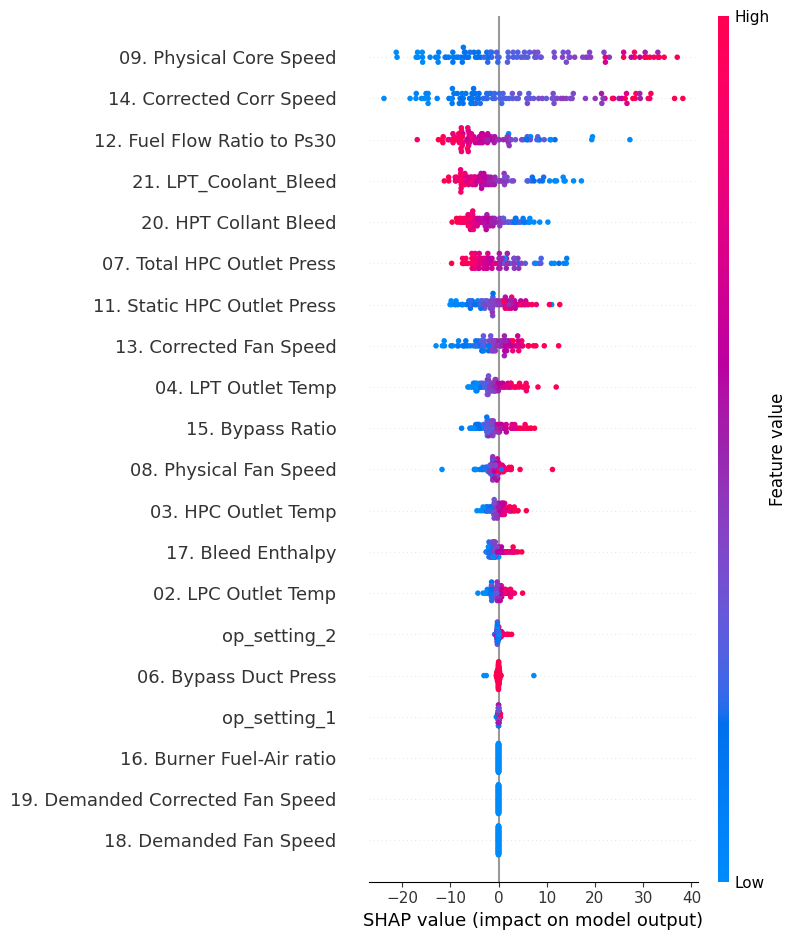

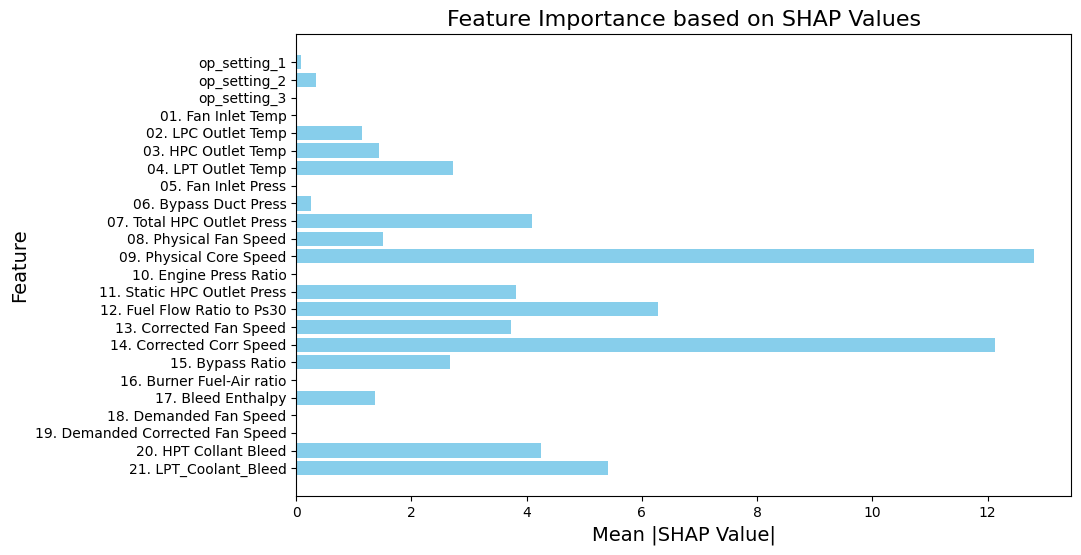

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
RMSE: 43.49937701601311
MAE: 34.4556999206543


In [4]:
# 필요한 패키지 설치
!pip install shap matplotlib scikit-learn openpyxl

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------
# 1. 랜덤 시드 고정 (결과 일관성 유지)
# ----------------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# ----------------------------
# 2. C-MAPSS FD004 데이터 로드 및 전처리
# ----------------------------
# 데이터 로드 함수
def load_data():
    # 파일 경로 지정 (Google Drive 내 파일)
    base_dir = "/content/drive/MyDrive/jaeh04@pukyong.ac.kr 2021-11-22 01:12/데스크탑에서 올린 파일들/2025년 대한국방혁신공학회/"
    train_file = base_dir + "train_FD001.xlsx"
    columns_file = base_dir + "columns.xlsx"

    # 데이터 로드
    train_df = pd.read_excel(train_file, engine='openpyxl')
    columns_df = pd.read_excel(columns_file, engine='openpyxl')

    return train_df, columns_df

# 데이터 불러오기
train_data, columns_data = load_data()

# ----------------------------
# 3. 데이터 정규화 및 특성 선택 (피어슨 상관계수 vs. SHAP)
# ----------------------------
def normalize_data(df):
    scaler = MinMaxScaler()
    df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
    return df, scaler

# 데이터 정규화 수행
data, scaler = normalize_data(train_data)

# ----------------------------
# 4. LSTM 모델 정의
# ----------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(25, activation='relu'),
        Dense(1)  # RUL 예측
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ----------------------------
# 5. 데이터셋 분리 및 모델 학습
# ----------------------------
X = data.iloc[:, 2:].values  # 센서 데이터
y = data.iloc[:, 1].values   # RUL 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 모델 생성 및 학습
model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# ----------------------------
# 6. 모델 저장 및 재사용 (최신 형식 적용)
# ----------------------------

## ✅ 방법 1: 최신 Keras 형식 사용 (권장)
model.save("fixed_model.keras")  # Colab에서 사용 가능
model = tf.keras.models.load_model("fixed_model.keras")

## ✅ 방법 2: 기존 HDF5 (.h5) 방식 유지 (대체 옵션)
# model.save("fixed_model.h5")
# model = tf.keras.models.load_model("fixed_model.h5", compile=False)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# ----------------------------
# 7. SHAP 변수 중요도 분석 (컬럼명 적용)
# ----------------------------

# ✅ 원본 데이터의 컬럼명 저장 (Feature 1-23 대신 원본 스키마 사용)
feature_names = data.columns[2:].tolist()  # 첫 2개 컬럼(ID, RUL 제외)

# ✅ SHAP Explainer 적용 (모델 입력 차원과 동일하게 유지)
X_train_shap = X_train[:100]  # 원본 차원 유지 (100, 24, 1)
X_test_shap = X_test[:100]    # 원본 차원 유지 (100, 24, 1)

# ✅ SHAP Explainer 생성
explainer = shap.GradientExplainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

# ✅ SHAP 값의 차원 확인 후 변환 (리스트에서 NumPy 배열로 변환)
shap_values = np.array(shap_values)  # 리스트를 NumPy 배열로 변환
if shap_values.ndim == 4:  # (1, 샘플 수, 특성 수, 1) 형태일 경우 차원 축소
    shap_values = shap_values.squeeze()  # (샘플 수, 특성 수) 형태로 변환


# ----------------------------
# 8. SHAP 결과 시각화 (Summary Plot + Bar Chart 추가)
# ----------------------------

# ✅ X_test_shap도 2D 형태로 변환
X_test_shap_2d = X_test_shap.reshape(X_test_shap.shape[0], X_test_shap.shape[1])  # (100, 24)

# ✅ SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)

# ✅ SHAP Bar Chart (수정된 방법)
shap_importance = np.abs(shap_values).mean(axis=0)  # 특성별 SHAP 평균 절댓값 계산

plt.figure(figsize=(10, 6))
plt.barh(feature_names, shap_importance, color='skyblue')  # 바 차트 생성
plt.xlabel("Mean |SHAP Value|", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance based on SHAP Values", fontsize=16)
plt.gca().invert_yaxis()  # 중요도가 높은 피처를 위로 정렬
plt.show()

# ----------------------------
# 9. 성능 평가
# ----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

2025.03.07 16:05

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/tmp/ipython-input-3988822738.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - loss: 10342.1484 - val_loss: 4696.7666
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 4781.1465 - val_loss: 4700.5747
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 4781.9932 - val_loss: 4703.6528
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 4782.5664 - val_loss: 4705.9028
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 4782.9355 - val_loss: 4707.4326
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 4783.1646 - val_loss: 4708.4219
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 4783.2974 - val_loss: 4709.0542
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 4783.3164 - val_loss: 4711.7334
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 4466.0815 - val_loss: 2714.0925
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 2416.0027 - val_loss: 2215.6575
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 2297.2

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_2
Received: inputs=['Tensor(shape=(100, 24, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_2
Received: inputs=['Tensor(shape=(50, 24, 1))']
  warnings.warn(msg)
/tmp/ipython-input-3988822738.py:129: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)


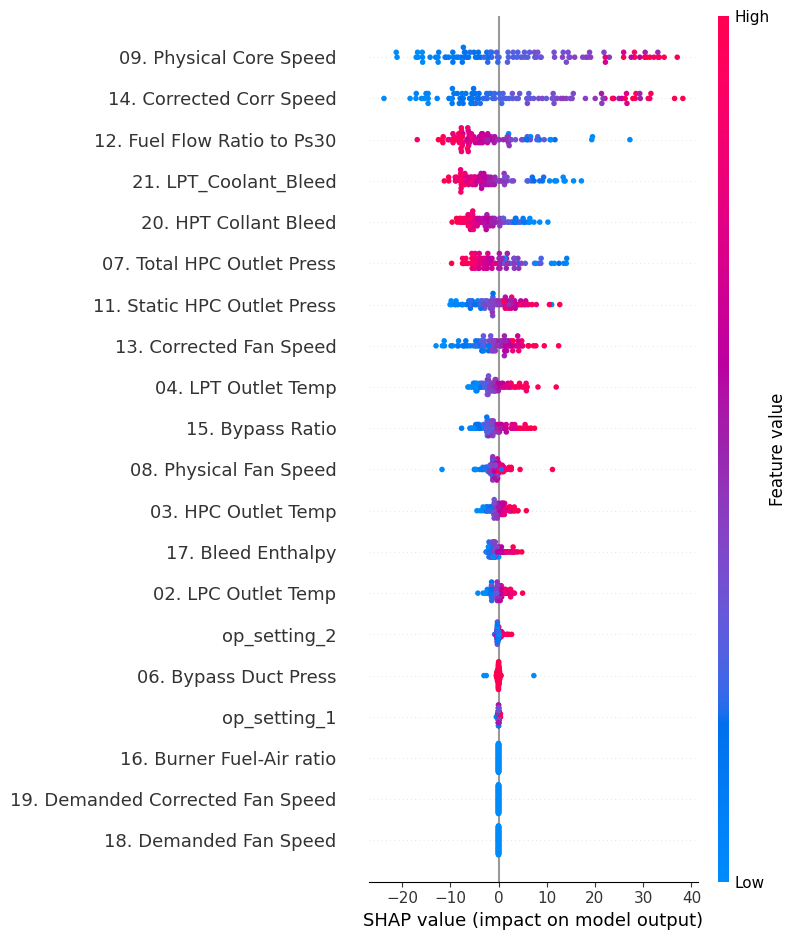

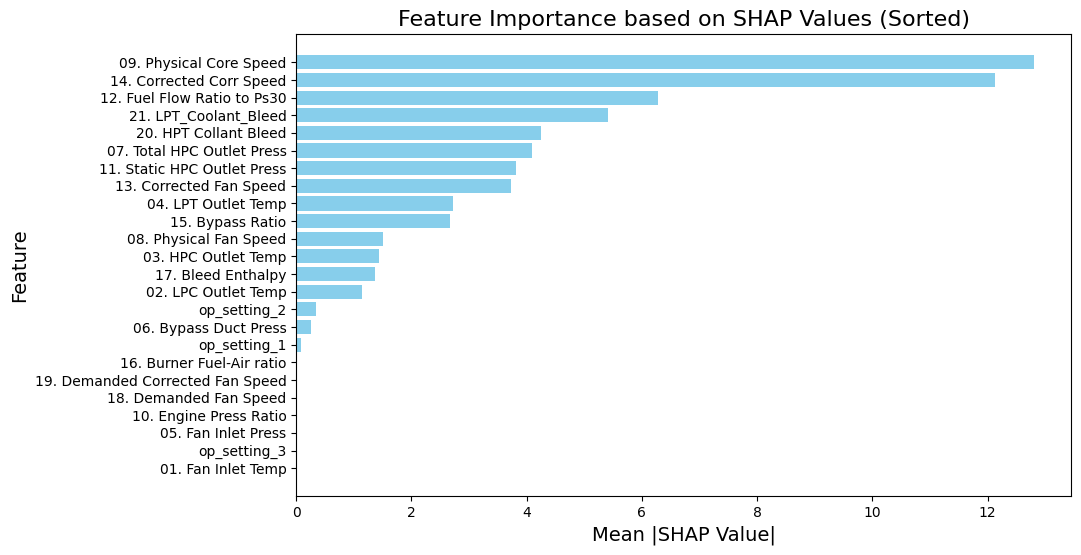

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
RMSE: 43.49937701601311
MAE: 34.4556999206543


In [3]:
# 필요한 패키지 설치
!pip install shap matplotlib scikit-learn openpyxl

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------
# 1. 랜덤 시드 고정 (결과 일관성 유지)
# ----------------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# ----------------------------
# 2. C-MAPSS FD004 데이터 로드 및 전처리
# ----------------------------
# 데이터 로드 함수
def load_data():
    # 파일 경로 지정 (Google Drive 내 파일)
    base_dir = "/content/drive/MyDrive/jaeh04@pukyong.ac.kr 2021-11-22 01:12/데스크탑에서 올린 파일들/2025년 대한국방혁신공학회/"
    train_file = base_dir + "train_FD001.xlsx"
    columns_file = base_dir + "columns.xlsx"

    # 데이터 로드
    train_df = pd.read_excel(train_file, engine='openpyxl')
    columns_df = pd.read_excel(columns_file, engine='openpyxl')

    return train_df, columns_df

# 데이터 불러오기
train_data, columns_data = load_data()

# ----------------------------
# 3. 데이터 정규화 및 특성 선택 (피어슨 상관계수 vs. SHAP)
# ----------------------------
def normalize_data(df):
    scaler = MinMaxScaler()
    df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
    return df, scaler

# 데이터 정규화 수행
data, scaler = normalize_data(train_data)

# ----------------------------
# 4. LSTM 모델 정의
# ----------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(25, activation='relu'),
        Dense(1)  # RUL 예측
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ----------------------------
# 5. 데이터셋 분리 및 모델 학습
# ----------------------------
X = data.iloc[:, 2:].values  # 센서 데이터
y = data.iloc[:, 1].values   # RUL 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 모델 생성 및 학습
model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# ----------------------------
# 6. 모델 저장 및 재사용 (최신 형식 적용)
# ----------------------------

## ✅ 방법 1: 최신 Keras 형식 사용 (권장)
model.save("fixed_model.keras")  # Colab에서 사용 가능
model = tf.keras.models.load_model("fixed_model.keras")

## ✅ 방법 2: 기존 HDF5 (.h5) 방식 유지 (대체 옵션)
# model.save("fixed_model.h5")
# model = tf.keras.models.load_model("fixed_model.h5", compile=False)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# ----------------------------
# 7. SHAP 변수 중요도 분석 (컬럼명 적용)
# ----------------------------

# ✅ 원본 데이터의 컬럼명 저장 (Feature 1-23 대신 원본 스키마 사용)
feature_names = data.columns[2:].tolist()  # 첫 2개 컬럼(ID, RUL 제외)

# ✅ SHAP Explainer 적용 (모델 입력 차원과 동일하게 유지)
X_train_shap = X_train[:100]  # 원본 차원 유지 (100, 24, 1)
X_test_shap = X_test[:100]    # 원본 차원 유지 (100, 24, 1)

# ✅ SHAP Explainer 생성
explainer = shap.GradientExplainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

# ✅ SHAP 값의 차원 확인 후 변환 (리스트에서 NumPy 배열로 변환)
shap_values = np.array(shap_values)  # 리스트를 NumPy 배열로 변환
if shap_values.ndim == 4:  # (1, 샘플 수, 특성 수, 1) 형태일 경우 차원 축소
    shap_values = shap_values.squeeze()  # (샘플 수, 특성 수) 형태로 변환


# ----------------------------
# 8. SHAP 결과 시각화 (Summary Plot + 정렬된 Bar Chart)
# ----------------------------

# ✅ X_test_shap도 2D 형태로 변환
X_test_shap_2d = X_test_shap.reshape(X_test_shap.shape[0], X_test_shap.shape[1])  # (100, 24)

# ✅ SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)

# ✅ SHAP Bar Chart (정렬 추가)
shap_importance = np.abs(shap_values).mean(axis=0)  # 특성별 SHAP 평균 절댓값 계산

# ✅ SHAP 중요도 값 기준으로 내림차순 정렬
sorted_idx = np.argsort(shap_importance)[::-1]  # 큰 값부터 정렬된 인덱스

sorted_shap_importance = shap_importance[sorted_idx]  # 정렬된 SHAP 값
sorted_feature_names = np.array(feature_names)[sorted_idx]  # 정렬된 피처 이름

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_shap_importance, color='skyblue')  # 바 차트 생성
plt.xlabel("Mean |SHAP Value|", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance based on SHAP Values (Sorted)", fontsize=16)
plt.gca().invert_yaxis()  # 중요도가 높은 피처를 위로 정렬
plt.show()


# ----------------------------
# 9. 성능 평가
# ----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

2025.03.07 17:00 Epoch = 50

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/tmp/ipython-input-891946714.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - loss: 10342.1484 - val_loss: 4696.7666
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 4781.1465 - val_loss: 4700.5747
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 4781.9932 - val_loss: 4703.6528
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - loss: 4782.5664 - val_loss: 4705.9028
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - loss: 4782.9355 - val_loss: 4707.4326
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 4783.1646 - val_loss: 4708.4219
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 4783.2974 - val_loss: 4709.0542
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 4783.3164 - val_loss: 4711.7334
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 4466.0815 - val_loss: 2714.0925
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 2416.0027 - val_loss: 2215.6575
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 2297.2

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=['Tensor(shape=(100, 24, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=['Tensor(shape=(50, 24, 1))']
  warnings.warn(msg)
/tmp/ipython-input-891946714.py:129: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)


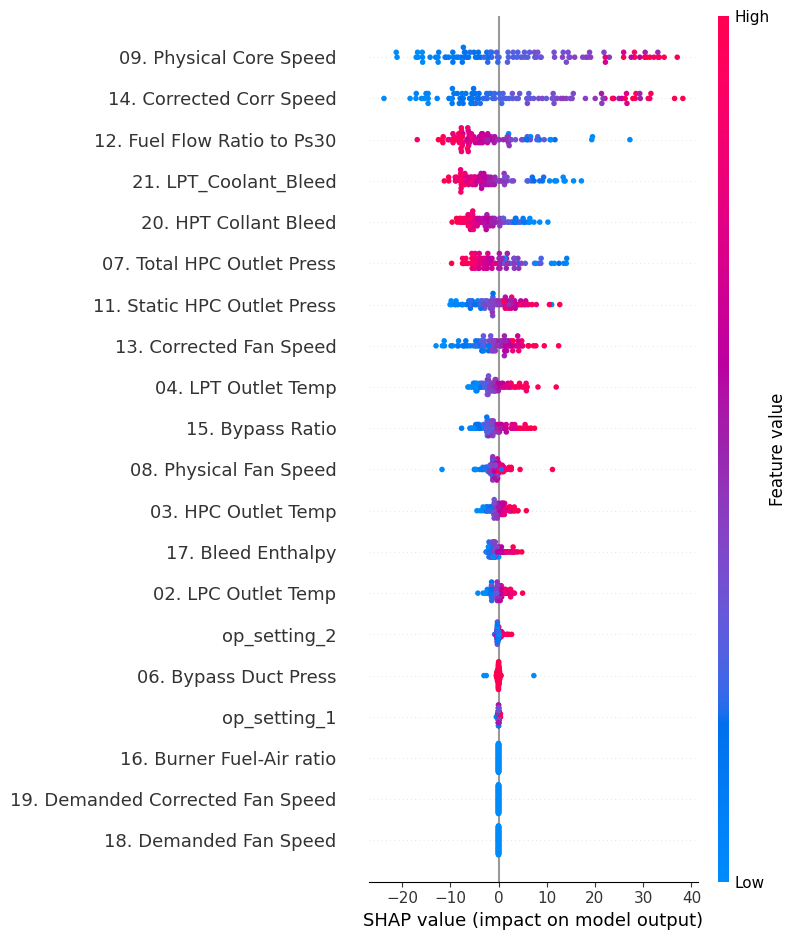

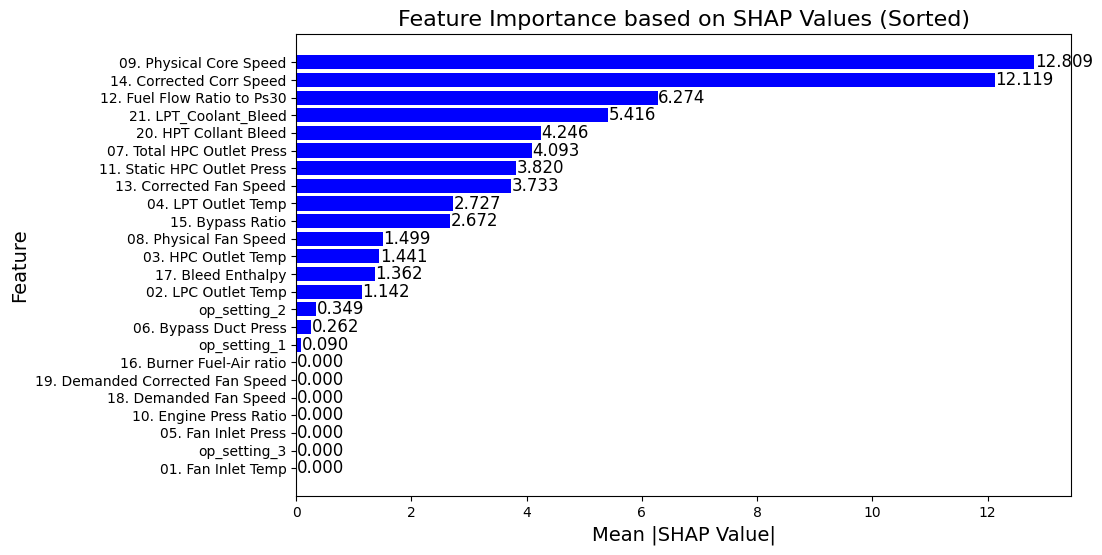

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
RMSE: 43.49937701601311
MAE: 34.4556999206543


In [2]:
# 필요한 패키지 설치
!pip install shap matplotlib scikit-learn openpyxl

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------
# 1. 랜덤 시드 고정 (결과 일관성 유지)
# ----------------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# ----------------------------
# 2. C-MAPSS FD004 데이터 로드 및 전처리
# ----------------------------
# 데이터 로드 함수
def load_data():
    # 파일 경로 지정 (Google Drive 내 파일)
    base_dir = "/content/drive/MyDrive/jaeh04@pukyong.ac.kr 2021-11-22 01:12/데스크탑에서 올린 파일들/2025년 대한국방혁신공학회/"
    train_file = base_dir + "train_FD001.xlsx"
    columns_file = base_dir + "columns.xlsx"

    # 데이터 로드
    train_df = pd.read_excel(train_file, engine='openpyxl')
    columns_df = pd.read_excel(columns_file, engine='openpyxl')

    return train_df, columns_df

# 데이터 불러오기
train_data, columns_data = load_data()

# ----------------------------
# 3. 데이터 정규화 및 특성 선택 (피어슨 상관계수 vs. SHAP)
# ----------------------------
def normalize_data(df):
    scaler = MinMaxScaler()
    df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
    return df, scaler

# 데이터 정규화 수행
data, scaler = normalize_data(train_data)

# ----------------------------
# 4. LSTM 모델 정의
# ----------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(25, activation='relu'),
        Dense(1)  # RUL 예측
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ----------------------------
# 5. 데이터셋 분리 및 모델 학습
# ----------------------------
X = data.iloc[:, 2:].values  # 센서 데이터
y = data.iloc[:, 1].values   # RUL 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 모델 생성 및 학습
model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# ----------------------------
# 6. 모델 저장 및 재사용 (최신 형식 적용)
# ----------------------------

## ✅ 방법 1: 최신 Keras 형식 사용 (권장)
model.save("fixed_model.keras")  # Colab에서 사용 가능
model = tf.keras.models.load_model("fixed_model.keras")

## ✅ 방법 2: 기존 HDF5 (.h5) 방식 유지 (대체 옵션)
# model.save("fixed_model.h5")
# model = tf.keras.models.load_model("fixed_model.h5", compile=False)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# ----------------------------
# 7. SHAP 변수 중요도 분석 (컬럼명 적용)
# ----------------------------

# ✅ 원본 데이터의 컬럼명 저장 (Feature 1-23 대신 원본 스키마 사용)
feature_names = data.columns[2:].tolist()  # 첫 2개 컬럼(ID, RUL 제외)

# ✅ SHAP Explainer 적용 (모델 입력 차원과 동일하게 유지)
X_train_shap = X_train[:100]  # 원본 차원 유지 (100, 24, 1)
X_test_shap = X_test[:100]    # 원본 차원 유지 (100, 24, 1)

# ✅ SHAP Explainer 생성
explainer = shap.GradientExplainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

# ✅ SHAP 값의 차원 확인 후 변환 (리스트에서 NumPy 배열로 변환)
shap_values = np.array(shap_values)  # 리스트를 NumPy 배열로 변환
if shap_values.ndim == 4:  # (1, 샘플 수, 특성 수, 1) 형태일 경우 차원 축소
    shap_values = shap_values.squeeze()  # (샘플 수, 특성 수) 형태로 변환


# ----------------------------
# 8. SHAP 결과 시각화 (Summary Plot + 정렬된 Bar Chart)
# ----------------------------

# ✅ X_test_shap도 2D 형태로 변환
X_test_shap_2d = X_test_shap.reshape(X_test_shap.shape[0], X_test_shap.shape[1])  # (100, 24)

# ✅ SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)

# ✅ SHAP Bar Chart (정렬 추가 + 수치 표시)
shap_importance = np.abs(shap_values).mean(axis=0)  # 특성별 SHAP 평균 절댓값 계산

# ✅ SHAP 중요도 값 기준으로 내림차순 정렬
sorted_idx = np.argsort(shap_importance)[::-1]  # 큰 값부터 정렬된 인덱스

sorted_shap_importance = shap_importance[sorted_idx]  # 정렬된 SHAP 값
sorted_feature_names = np.array(feature_names)[sorted_idx]  # 정렬된 피처 이름

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_shap_importance, color='blue')  # ✅ 색상 변경

# ✅ 각 bar 위에 수치값 표시 (소수점 3자리까지)
for bar, value in zip(bars, sorted_shap_importance):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.3f}", va='center', fontsize=12, color='black')

plt.xlabel("Mean |SHAP Value|", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance based on SHAP Values (Sorted)", fontsize=16)
plt.gca().invert_yaxis()  # 중요도가 높은 피처를 위로 정렬
plt.show()



# ----------------------------
# 9. 성능 평가
# ----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

2025.03.08 01:00 Epoch = 100

Mounted at /content/drive


/tmp/ipython-input-3492994489.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - loss: 7094.9688 - val_loss: 4735.8984
Epoch 2/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - loss: 4786.0117 - val_loss: 4736.6807
Epoch 3/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - loss: 4786.3828 - val_loss: 4736.7910
Epoch 4/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - loss: 4786.4917 - val_loss: 4736.8032
Epoch 5/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 4786.4990 - val_loss: 4736.6562
Epoch 6/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 4730.5762 - val_loss: 2423.5986
Epoch 7/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 2325.7874 - val_loss: 2068.6960
Epoch 8/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - loss: 2144.8491 - val_loss: 2031.2018
Epoch 9/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - loss: 2115.3647 - val_loss: 2006.3568
Epoch 10/100
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 2096.7097 - val_loss: 1991.1920
Epoch 11/100
1032/1032 ━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(100, 24, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(50, 24, 1))']
  warnings.warn(msg)
/tmp/ipython-input-3492994489.py:131: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)


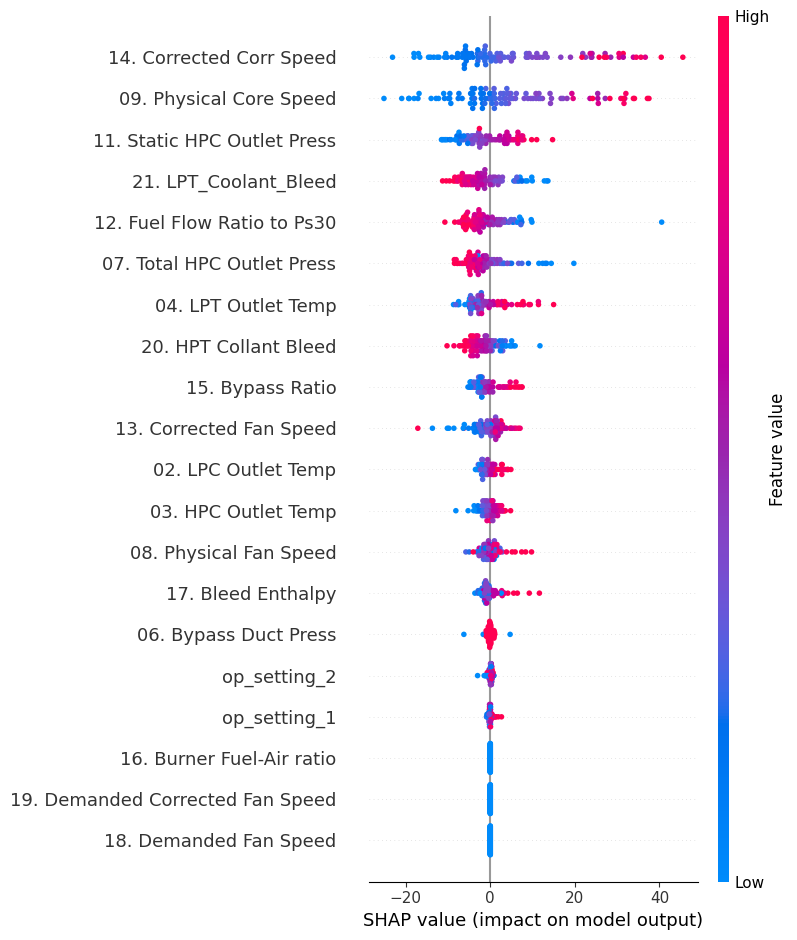

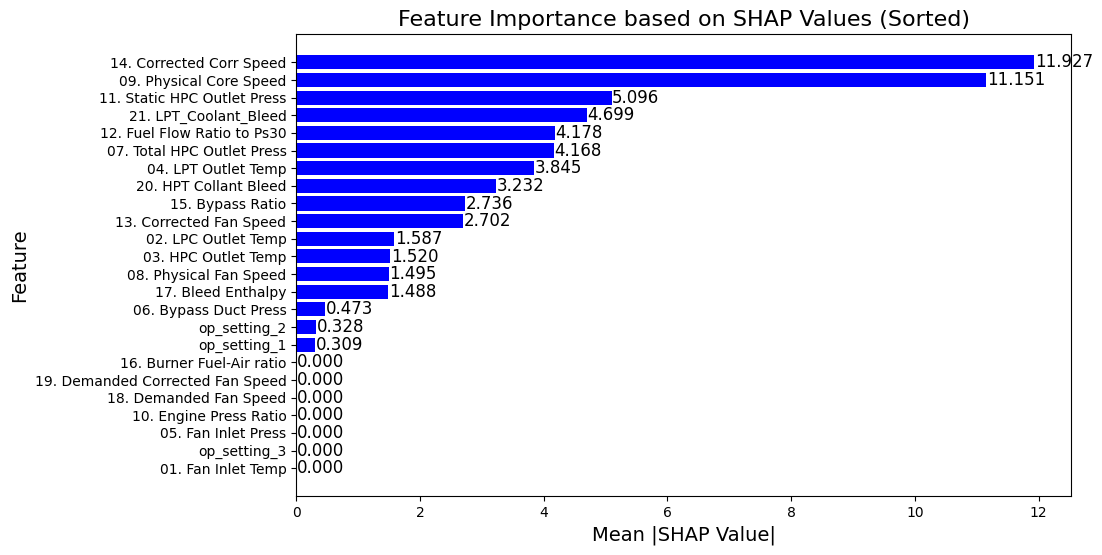

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
RMSE: 43.74978934101069
MAE: 34.62842559814453


In [1]:
# 필요한 패키지 설치
!pip install shap matplotlib scikit-learn openpyxl

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------
# 1. 랜덤 시드 고정 (결과 일관성 유지)
# ----------------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# ----------------------------
# 2. C-MAPSS FD004 데이터 로드 및 전처리
# ----------------------------
# 데이터 로드 함수
def load_data():
    # 파일 경로 지정 (Google Drive 내 파일)
    base_dir = "/content/drive/MyDrive/jaeh04@pukyong.ac.kr 2021-11-22 01:12/데스크탑에서 올린 파일들/2025년 대한국방혁신공학회/"
    train_file = base_dir + "train_FD001.xlsx"
    columns_file = base_dir + "columns.xlsx"

    # 데이터 로드
    train_df = pd.read_excel(train_file, engine='openpyxl')
    columns_df = pd.read_excel(columns_file, engine='openpyxl')

    return train_df, columns_df

# 데이터 불러오기
train_data, columns_data = load_data()

# ----------------------------
# 3. 데이터 정규화 및 특성 선택 (피어슨 상관계수 vs. SHAP)
# ----------------------------
def normalize_data(df):
    scaler = MinMaxScaler()
    df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
    return df, scaler

# 데이터 정규화 수행
data, scaler = normalize_data(train_data)


# ----------------------------
# 4. LSTM 모델 정의 (하이퍼파라미터 수정)
# ----------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),  # ✅ 뉴런 수 100으로 증가
        LSTM(100),  # ✅ 두 번째 LSTM도 100으로 증가
        Dense(50, activation='relu'),  # ✅ Dense 뉴런 수도 증가
        Dense(1)  # RUL 예측
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ----------------------------
# 5. 데이터셋 분리 및 모델 학습 (epochs, batch_size 변경)
# ----------------------------
X = data.iloc[:, 2:].values  # 센서 데이터
y = data.iloc[:, 1].values   # RUL 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 모델 생성 및 학습 (epochs=100, batch_size=16로 변경)
model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))


# ----------------------------
# 6. 모델 저장 및 재사용 (최신 형식 적용)
# ----------------------------

## ✅ 방법 1: 최신 Keras 형식 사용 (권장)
model.save("fixed_model.keras")  # Colab에서 사용 가능
model = tf.keras.models.load_model("fixed_model.keras")

## ✅ 방법 2: 기존 HDF5 (.h5) 방식 유지 (대체 옵션)
# model.save("fixed_model.h5")
# model = tf.keras.models.load_model("fixed_model.h5", compile=False)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# ----------------------------
# 7. SHAP 변수 중요도 분석 (컬럼명 적용)
# ----------------------------

# ✅ 원본 데이터의 컬럼명 저장 (Feature 1-23 대신 원본 스키마 사용)
feature_names = data.columns[2:].tolist()  # 첫 2개 컬럼(ID, RUL 제외)

# ✅ SHAP Explainer 적용 (모델 입력 차원과 동일하게 유지)
X_train_shap = X_train[:100]  # 원본 차원 유지 (100, 24, 1)
X_test_shap = X_test[:100]    # 원본 차원 유지 (100, 24, 1)

# ✅ SHAP Explainer 생성
explainer = shap.GradientExplainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

# ✅ SHAP 값의 차원 확인 후 변환 (리스트에서 NumPy 배열로 변환)
shap_values = np.array(shap_values)  # 리스트를 NumPy 배열로 변환
if shap_values.ndim == 4:  # (1, 샘플 수, 특성 수, 1) 형태일 경우 차원 축소
    shap_values = shap_values.squeeze()  # (샘플 수, 특성 수) 형태로 변환


# ----------------------------
# 8. SHAP 결과 시각화 (Summary Plot + 정렬된 Bar Chart)
# ----------------------------

# ✅ X_test_shap도 2D 형태로 변환
X_test_shap_2d = X_test_shap.reshape(X_test_shap.shape[0], X_test_shap.shape[1])  # (100, 24)

# ✅ SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)

# ✅ SHAP Bar Chart (정렬 추가 + 수치 표시)
shap_importance = np.abs(shap_values).mean(axis=0)  # 특성별 SHAP 평균 절댓값 계산

# ✅ SHAP 중요도 값 기준으로 내림차순 정렬
sorted_idx = np.argsort(shap_importance)[::-1]  # 큰 값부터 정렬된 인덱스

sorted_shap_importance = shap_importance[sorted_idx]  # 정렬된 SHAP 값
sorted_feature_names = np.array(feature_names)[sorted_idx]  # 정렬된 피처 이름

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_shap_importance, color='blue')  # ✅ 색상 변경

# ✅ 각 bar 위에 수치값 표시 (소수점 3자리까지)
for bar, value in zip(bars, sorted_shap_importance):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.3f}", va='center', fontsize=12, color='black')

plt.xlabel("Mean |SHAP Value|", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance based on SHAP Values (Sorted)", fontsize=16)
plt.gca().invert_yaxis()  # 중요도가 높은 피처를 위로 정렬
plt.show()



# ----------------------------
# 9. 성능 평가
# ----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

2025.03.08 16:21 train, test 데이터 별도로 업로드
Epoch = 50

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/tmp/ipython-input-2642781615.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.iloc[:, 2:] = scaler.fit_transform(train_df.iloc[:, 2:])  # ✅ 스케일러 학습 및 적용
/tmp/ipython-input-2642781615.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.41666667 0.41666667 ... 0.58333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df.iloc[:, 2:] = scaler.transform(test_df.iloc[:, 2:])  # ✅ 동일 스케일러로 test 데이터 정규화
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `

516/516 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - loss: 7589.2729 - val_loss: 6385.5430
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 4337.4561 - val_loss: 6389.1768
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - loss: 4337.8774 - val_loss: 6392.4688
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - loss: 4338.1099 - val_loss: 6394.8022
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 4338.2466 - val_loss: 6396.3027
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 4338.3276 - val_loss: 6397.2231
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 4338.3706 - val_loss: 6397.7988
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - loss: 4338.3726 - val_loss: 6399.0488
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 3964.4966 - val_loss: 3456.3689
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - loss: 2210.5232 - val_loss: 3308.4111
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 2063.07

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=['Tensor(shape=(100, 24, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=['Tensor(shape=(50, 24, 1))']
  warnings.warn(msg)
/tmp/ipython-input-2642781615.py:122: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)


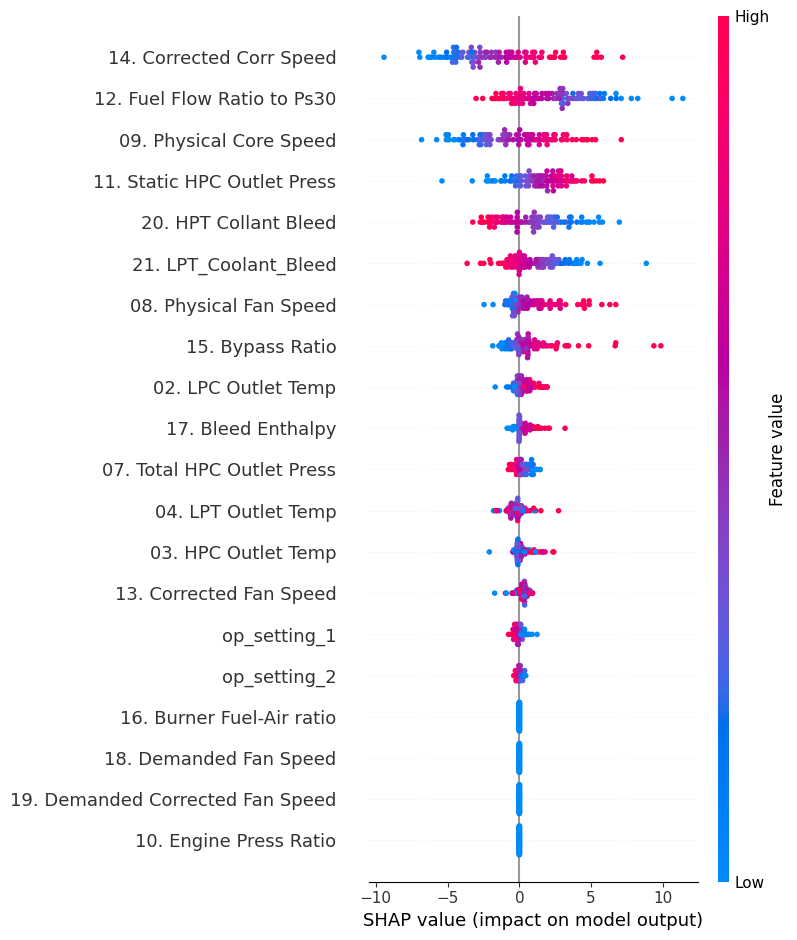

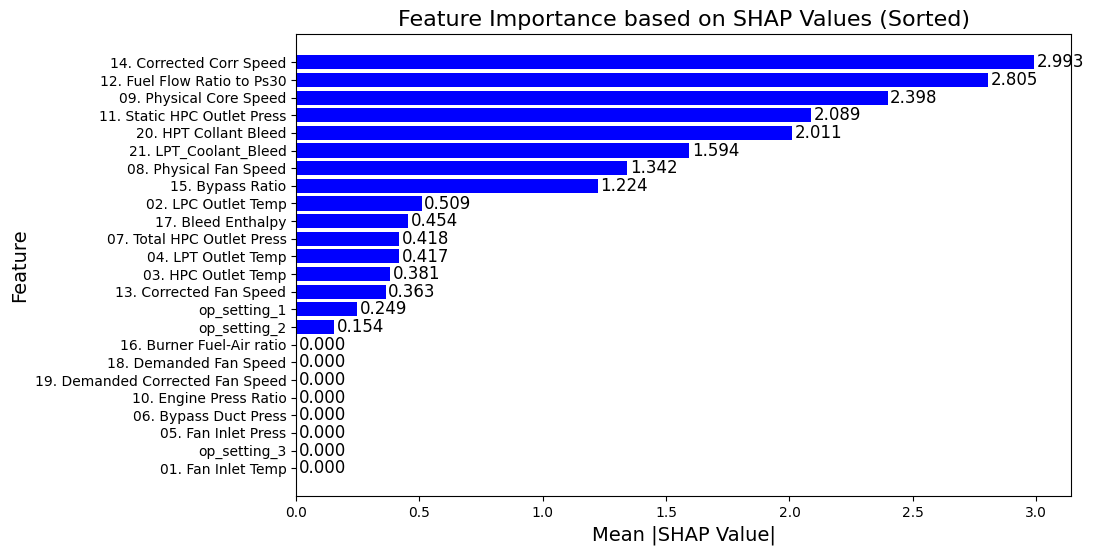

410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
RMSE: 41.321019296989604
MAE: 33.15401840209961


In [ ]:
# 필요한 패키지 설치
!pip install shap matplotlib scikit-learn openpyxl

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------
# 1. 랜덤 시드 고정 (결과 일관성 유지)
# ----------------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# ----------------------------
# 2. C-MAPSS FD004 데이터 로드 및 전처리 (Train + Test 별도 처리)
# ----------------------------
# 데이터 로드 함수
def load_data():
    # 파일 경로 지정 (Google Drive 내 파일)
    base_dir = "/content/drive/MyDrive/jaeh04@pukyong.ac.kr 2021-11-22 01:12/데스크탑에서 올린 파일들/2025년 대한국방혁신공학회/"
    train_file = base_dir + "train_FD001.xlsx"
    test_file = base_dir + "test_FD001.xlsx"  # ✅ 별도 테스트 파일 추가
    columns_file = base_dir + "columns.xlsx"

    # 데이터 로드
    train_df = pd.read_excel(train_file, engine='openpyxl')
    test_df = pd.read_excel(test_file, engine='openpyxl')  # ✅ 테스트 데이터 로드
    columns_df = pd.read_excel(columns_file, engine='openpyxl')

    return train_df, test_df, columns_df

# 데이터 불러오기
train_data, test_data, columns_data = load_data()

# ----------------------------
# 3. 데이터 정규화 및 특성 선택 (피어슨 상관계수 vs. SHAP)
# ----------------------------
# ✅ Train 데이터를 이용해 스케일러 학습 후 Test에 동일하게 적용
def normalize_data(train_df, test_df):
    scaler = MinMaxScaler()
    train_df.iloc[:, 2:] = scaler.fit_transform(train_df.iloc[:, 2:])  # ✅ 스케일러 학습 및 적용
    test_df.iloc[:, 2:] = scaler.transform(test_df.iloc[:, 2:])  # ✅ 동일 스케일러로 test 데이터 정규화
    return train_df, test_df, scaler

# 데이터 정규화 수행
train_data, test_data, scaler = normalize_data(train_data, test_data)

# ----------------------------
# 4. LSTM 모델 정의 (기본 구조 유지)
# ----------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),  # ✅ 뉴런 수 증가 가능
        LSTM(100),
        Dense(50, activation='relu'),
        Dense(1)  # RUL 예측
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ----------------------------
# 5. 데이터셋 분리 및 모델 학습 (Train 데이터만 사용)
# ----------------------------
X_train = train_data.iloc[:, 2:].values
y_train = train_data.iloc[:, 1].values
X_test = test_data.iloc[:, 2:].values
y_test = test_data.iloc[:, 1].values

# ✅ 모델 입력 차원 변환 (LSTM 입력 형식으로 변환)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ✅ 모델 생성 및 학습
model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# ----------------------------
# 6. 모델 저장 및 재사용 (최신 형식 적용)
# ----------------------------
model.save("fixed_model.keras")
model = tf.keras.models.load_model("fixed_model.keras")

# ----------------------------
# 7. SHAP 변수 중요도 분석 (컬럼명 적용)
# ----------------------------
# ✅ 원본 데이터의 컬럼명 저장 (Feature 1-23 대신 원본 스키마 사용)
feature_names = train_data.columns[2:].tolist()

# ✅ SHAP Explainer 적용
X_train_shap = X_train[:100]
X_test_shap = X_test[:100]

explainer = shap.GradientExplainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

shap_values = np.array(shap_values)
if shap_values.ndim == 4:
    shap_values = shap_values.squeeze()

# ----------------------------
# 8. SHAP 결과 시각화
# ----------------------------
X_test_shap_2d = X_test_shap.reshape(X_test_shap.shape[0], X_test_shap.shape[1])

# ✅ SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)

# ✅ SHAP Bar Chart
shap_importance = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(shap_importance)[::-1]
sorted_shap_importance = shap_importance[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_shap_importance, color='blue')
for bar, value in zip(bars, sorted_shap_importance):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.3f}", va='center', fontsize=12, color='black')

plt.xlabel("Mean |SHAP Value|", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance based on SHAP Values (Sorted)", fontsize=16)
plt.gca().invert_yaxis()
plt.show()

# ----------------------------
# 9. 성능 평가 (새로운 Test Set 기준)
# ----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


2025.03.08 16:21 train, test 데이터 별도로 업로드
Epoch = 100

Mounted at /content/drive


/tmp/ipython-input-1266496429.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.16666667 ... 0.83333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.iloc[:, 2:] = scaler.fit_transform(train_df.iloc[:, 2:])  # ✅ 스케일러 학습 및 적용
/tmp/ipython-input-1266496429.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.41666667 0.41666667 ... 0.58333333 0.58333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df.iloc[:, 2:] = scaler.transform(test_df.iloc[:, 2:])  # ✅ 동일 스케일러로 test 데이터 정규화
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - loss: 7589.2729 - val_loss: 6385.5430
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 4337.4561 - val_loss: 6389.1768
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 4337.8774 - val_loss: 6392.4688
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 4338.1099 - val_loss: 6394.8022
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - loss: 4338.2466 - val_loss: 6396.3027
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 4338.3276 - val_loss: 6397.2231
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - loss: 4338.3706 - val_loss: 6397.7988
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 4338.3726 - val_loss: 6399.0488
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - loss: 3964.4966 - val_loss: 3456.3689
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 2210.5232 - val_loss: 3308.4111
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 43m

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(100, 24, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(50, 24, 1))']
  warnings.warn(msg)
/tmp/ipython-input-1266496429.py:122: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)


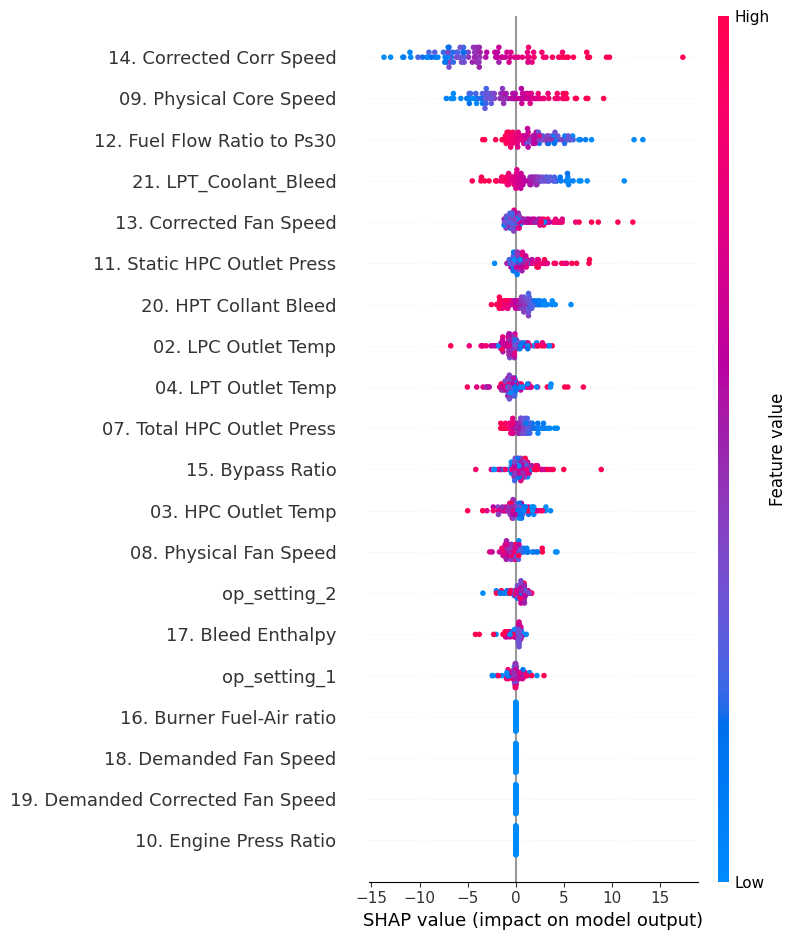

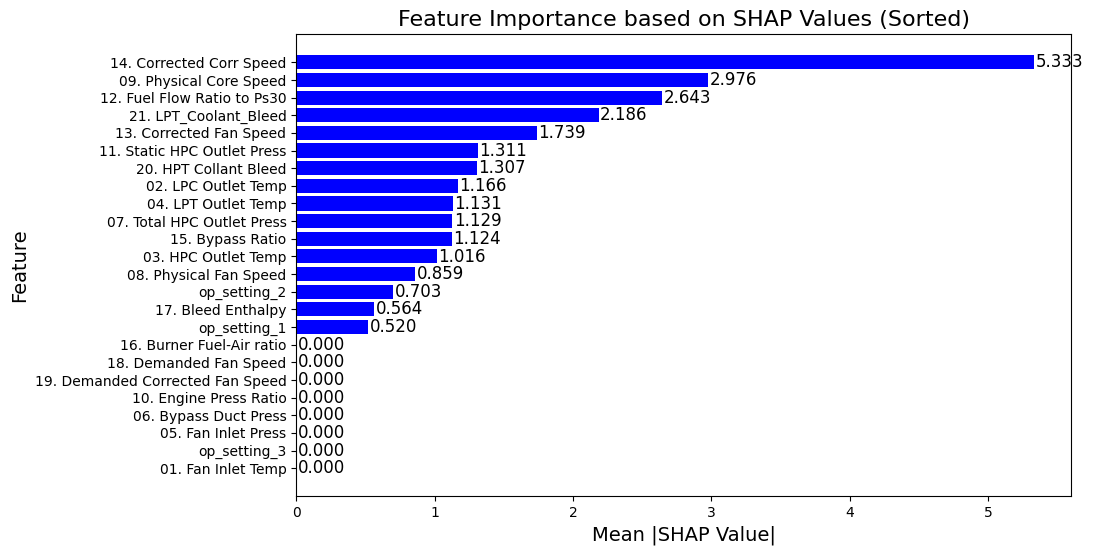

410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step
RMSE: 41.67838344375145
MAE: 33.257957458496094


In [ ]:
# 필요한 패키지 설치
!pip install shap matplotlib scikit-learn openpyxl

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ----------------------------
# 1. 랜덤 시드 고정 (결과 일관성 유지)
# ----------------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# ----------------------------
# 2. C-MAPSS FD004 데이터 로드 및 전처리 (Train + Test 별도 처리)
# ----------------------------
# 데이터 로드 함수
def load_data():
    # 파일 경로 지정 (Google Drive 내 파일)
    base_dir = "/content/drive/MyDrive/jaeh04@pukyong.ac.kr 2021-11-22 01:12/데스크탑에서 올린 파일들/2025년 대한국방혁신공학회/"
    train_file = base_dir + "train_FD001.xlsx"
    test_file = base_dir + "test_FD001.xlsx"  # ✅ 별도 테스트 파일 추가
    columns_file = base_dir + "columns.xlsx"

    # 데이터 로드
    train_df = pd.read_excel(train_file, engine='openpyxl')
    test_df = pd.read_excel(test_file, engine='openpyxl')  # ✅ 테스트 데이터 로드
    columns_df = pd.read_excel(columns_file, engine='openpyxl')

    return train_df, test_df, columns_df

# 데이터 불러오기
train_data, test_data, columns_data = load_data()

# ----------------------------
# 3. 데이터 정규화 및 특성 선택 (피어슨 상관계수 vs. SHAP)
# ----------------------------
# ✅ Train 데이터를 이용해 스케일러 학습 후 Test에 동일하게 적용
def normalize_data(train_df, test_df):
    scaler = MinMaxScaler()
    train_df.iloc[:, 2:] = scaler.fit_transform(train_df.iloc[:, 2:])  # ✅ 스케일러 학습 및 적용
    test_df.iloc[:, 2:] = scaler.transform(test_df.iloc[:, 2:])  # ✅ 동일 스케일러로 test 데이터 정규화
    return train_df, test_df, scaler

# 데이터 정규화 수행
train_data, test_data, scaler = normalize_data(train_data, test_data)

# ----------------------------
# 4. LSTM 모델 정의 (기본 구조 유지)
# ----------------------------
def build_model(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),  # ✅ 뉴런 수 증가 가능
        LSTM(100),
        Dense(50, activation='relu'),
        Dense(1)  # RUL 예측
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# ----------------------------
# 5. 데이터셋 분리 및 모델 학습 (Train 데이터만 사용)
# ----------------------------
X_train = train_data.iloc[:, 2:].values
y_train = train_data.iloc[:, 1].values
X_test = test_data.iloc[:, 2:].values
y_test = test_data.iloc[:, 1].values

# ✅ 모델 입력 차원 변환 (LSTM 입력 형식으로 변환)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ✅ 모델 생성 및 학습
model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# ----------------------------
# 6. 모델 저장 및 재사용 (최신 형식 적용)
# ----------------------------
model.save("fixed_model.keras")
model = tf.keras.models.load_model("fixed_model.keras")

# ----------------------------
# 7. SHAP 변수 중요도 분석 (컬럼명 적용)
# ----------------------------
# ✅ 원본 데이터의 컬럼명 저장 (Feature 1-23 대신 원본 스키마 사용)
feature_names = train_data.columns[2:].tolist()

# ✅ SHAP Explainer 적용
X_train_shap = X_train[:100]
X_test_shap = X_test[:100]

explainer = shap.GradientExplainer(model, X_train_shap)
shap_values = explainer.shap_values(X_test_shap)

shap_values = np.array(shap_values)
if shap_values.ndim == 4:
    shap_values = shap_values.squeeze()

# ----------------------------
# 8. SHAP 결과 시각화
# ----------------------------
X_test_shap_2d = X_test_shap.reshape(X_test_shap.shape[0], X_test_shap.shape[1])

# ✅ SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_shap_2d, feature_names=feature_names)

# ✅ SHAP Bar Chart
shap_importance = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(shap_importance)[::-1]
sorted_shap_importance = shap_importance[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_shap_importance, color='blue')
for bar, value in zip(bars, sorted_shap_importance):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.3f}", va='center', fontsize=12, color='black')

plt.xlabel("Mean |SHAP Value|", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance based on SHAP Values (Sorted)", fontsize=16)
plt.gca().invert_yaxis()
plt.show()

# ----------------------------
# 9. 성능 평가 (새로운 Test Set 기준)
# ----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
